In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names=['T-shirt\top','Trouser','Pullover','Dress','Coat','Sandal','shirt','Sneaker','Bag','Ankle boot']

In [5]:
len(train_images)

60000

In [6]:
len(train_labels)

60000

In [48]:
train_images.shape

(60000, 28, 28)

In [46]:
train_labels.shape

(60000,)

In [47]:
test_images.shape

(10000, 28, 28)

In [49]:
test_labels.shape

(10000,)

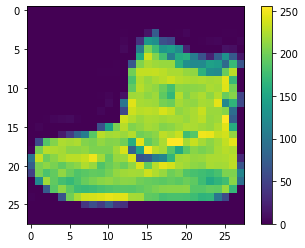

In [8]:
#check the range of pixel values
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

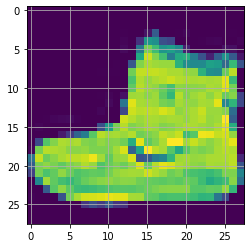

In [9]:
#check the range of pixel values
plt.figure()
plt.imshow(train_images[0])
# plt.colorbar()
plt.grid(True)
plt.show()

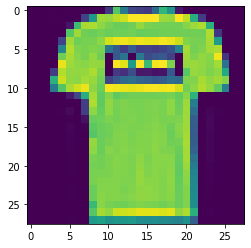

In [10]:
plt.figure()
plt.imshow(train_images[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


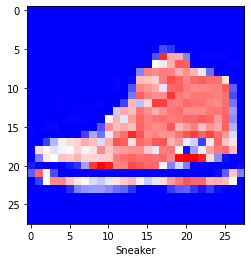

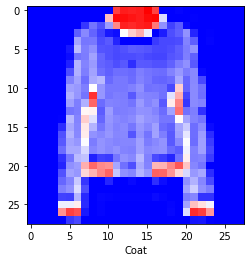

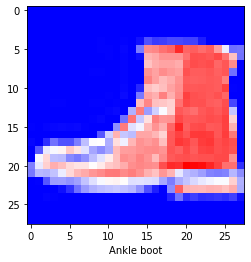

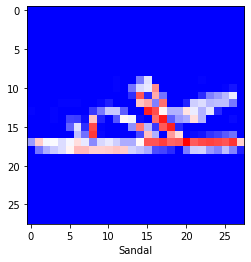

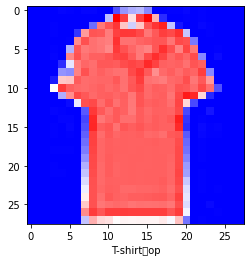

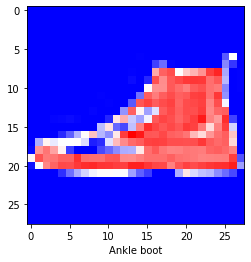

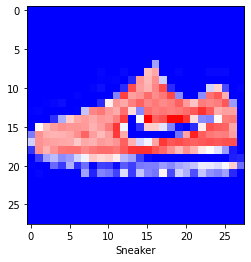

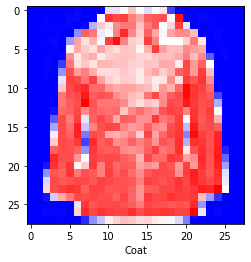

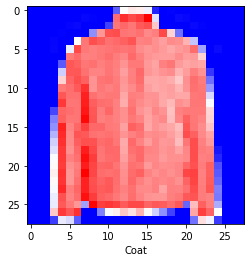

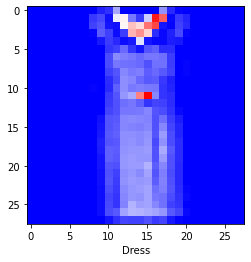

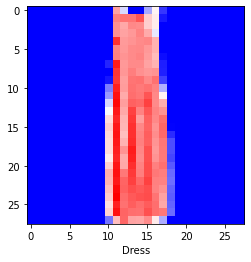

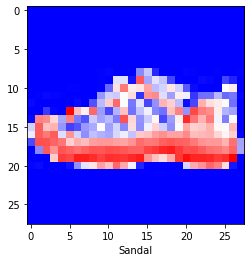

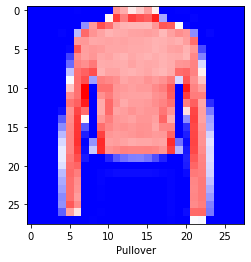

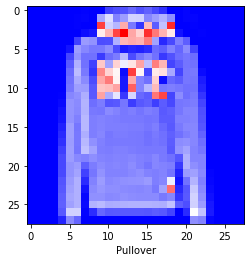

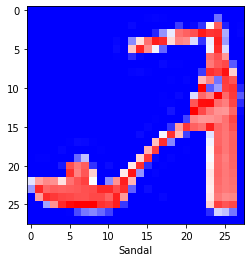

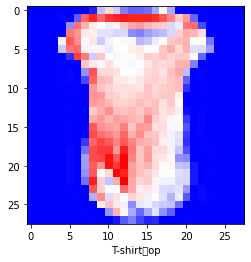

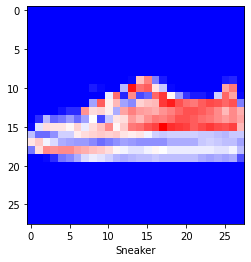

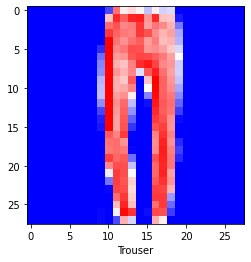

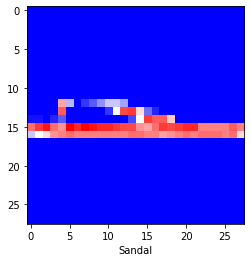

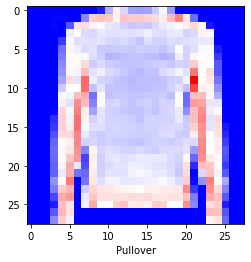

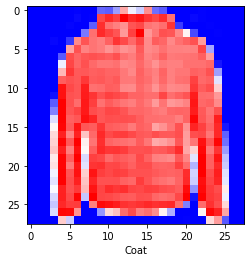

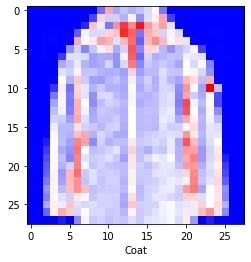

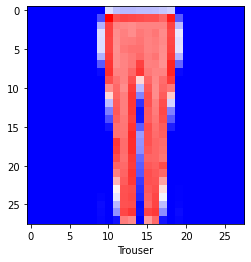

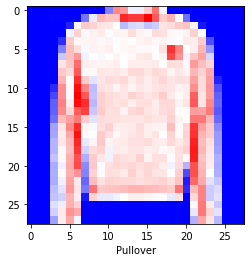

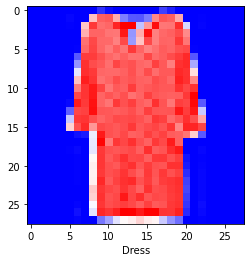

In [11]:
# plt.figure(figsize=(15,15))
for i in range(25):
  plt.figure()
  # plt.subplot(5,5,i+1)
  # plt.subplot(5,5,i+1)
  # plt.xticks([])
  # plt.yticks([])
  rand_no = random.randint(0,len(train_images))
  plt.imshow(train_images[rand_no],cmap='bwr')
  plt.xlabel(class_names[train_labels[rand_no]])

In [12]:
train_images = train_images/255.0

In [13]:
test_images = test_images / 255.0

In [14]:

def create_model():
  model = Sequential()
#input layer size is 784 after flattening
  model.add(Flatten(input_shape=(28, 28)))
  #hidden layer with 512 neurons
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
model = create_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
__________________________________________________

In [18]:
model.compile(optimizer='adam',
loss=SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [19]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping_callback = EarlyStopping(
monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
baseline=None, restore_best_weights=True
)

In [20]:
model.fit(x= train_images,y=train_labels,epochs=50,validation_split=0.2,callbacks=[tensorboard_callback,earlystopping_callback])

Epoch 1/50
1500/1500 [==============================] - 9s 4ms/step - loss: 0.6620 - accuracy: 0.7591 - val_loss: 0.4457 - val_accuracy: 0.8270
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3898 - accuracy: 0.8579 - val_loss: 0.3749 - val_accuracy: 0.8661
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3441 - accuracy: 0.8732 - val_loss: 0.3391 - val_accuracy: 0.8736
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3095 - accuracy: 0.8866 - val_loss: 0.3830 - val_accuracy: 0.8679
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2990 - accuracy: 0.8887 - val_loss: 0.3628 - val_accuracy: 0.8756
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2833 - accuracy: 0.8946 - val_loss: 0.3454 - val_accuracy: 0.8749


In [21]:
test_loss, test_acc= model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.3696 - accuracy: 0.8690


In [33]:
# training - 87.49%
# testing - 86.90%

In [34]:
pred = model.predict(test_images)

In [35]:
pred.shape

(10000, 10)

In [36]:
class_names[np.argmax(pred[1])]

'Pullover'

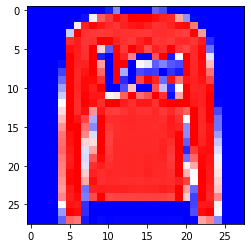

In [37]:
plt.imshow(test_images[1],cmap='bwr')

In [38]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
  100*np.max(predictions_array),
  class_names[true_label]),
  color=color)

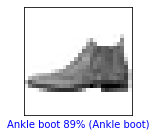

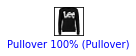

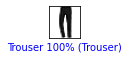

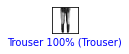

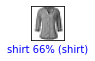

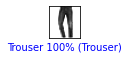

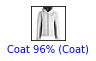

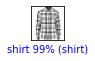

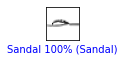

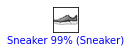

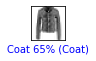

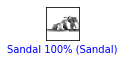

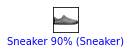

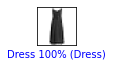

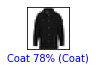

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i], test_labels, test_images)
  plt.tight_layout()
  plt.show()

In [40]:

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [41]:
#Loading the model from saved location
loaded_model = tf.keras.models.load_model('saved_model/my_model')


In [42]:


loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
__________________________________________________